<a href="https://colab.research.google.com/github/jeongjuk/jeongjuk/blob/main/%EB%B9%85%EC%BF%BC%EB%A6%AC%EC%97%B0%EB%8F%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas.io import gbq
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
query = """
select 
order_id
,order_distance_meter
,discount_amt
,order_amt
,payment_amt
,delivery_fee
,minimum_order_value
,delivery_type
,delivery_method_code_id
from `rgpkorea-datawarehouse.dhk_mart.fact_order_20220101`
where 1=1
and test_order_yn is false
and channel_name = 'yogiyo'
and order_result_code ="success"
and order_type = "touch"
and foodfly_restaurant_id is null
and order_distance_meter <= 20000
and order_distance_meter != 0
"""


In [ ]:
data = gbq.read_gbq(query, project_id = 'rgpkorea-sales')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=1KugghoH3nTlb3T6YQ72SX9XlcGOVn&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWivJkqUZEzsUK3MZRIzL4uRh5RMjVT3Gw7TGDl8yK-vSGnS9PGEsEM


In [ ]:
data.shape

(495491, 9)

In [ ]:
data = data.dropna()

In [ ]:
data = data.abs()

In [ ]:
data = data.astype('float')

In [ ]:
# 전처리
data = data[data['order_distance_meter'] !=0]
data = data[data['order_distance_meter'] <=20000]

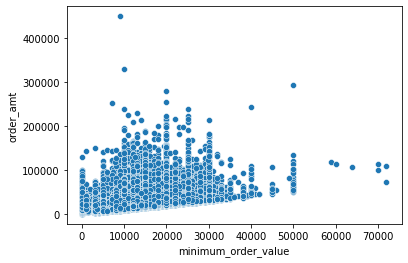

In [ ]:
sns.scatterplot(x = 'minimum_order_value',y = 'order_amt', data = data )

Text(0.5, 0, 'MOV')

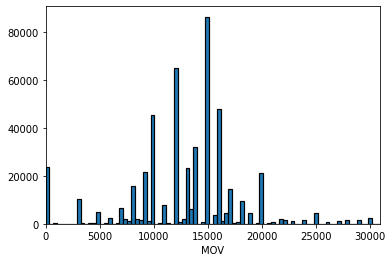

In [ ]:
plt.hist(data['minimum_order_value'], bins=200, edgecolor='black', linewidth=1.2)
plt.xlim([0, 31000])
plt.xlabel('MOV')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 7000.0)

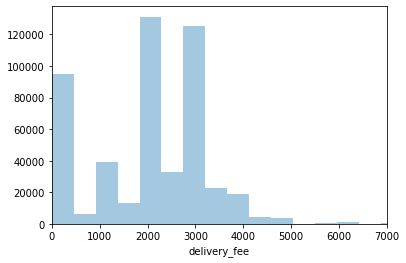

In [ ]:
sns.distplot(data['delivery_fee'], bins = 50, kde=False)
plt.xlim([0,7000])

In [ ]:
import pandas as pd
data['delivery_fee_cut'] = pd.cut(data.delivery_fee, bins=[0, 1001, 2001, 3001, 4001, 5001, 6001, 7001, 8001, 9001, 10001], 
                                  labels=['1천원이하', '2천원이하', '3천원이하', '4천원이하', '5천원이하', '6천원이하', '7천원이하', '8천원이하', '9천원이하', '1만원 이하'])


(1.0, 50000.0)

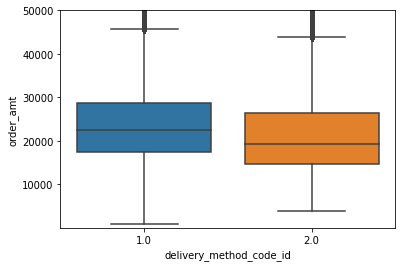

In [ ]:
sns.boxplot(x='delivery_method_code_id', y='order_amt', data=data)
plt.ylim(1,50000)

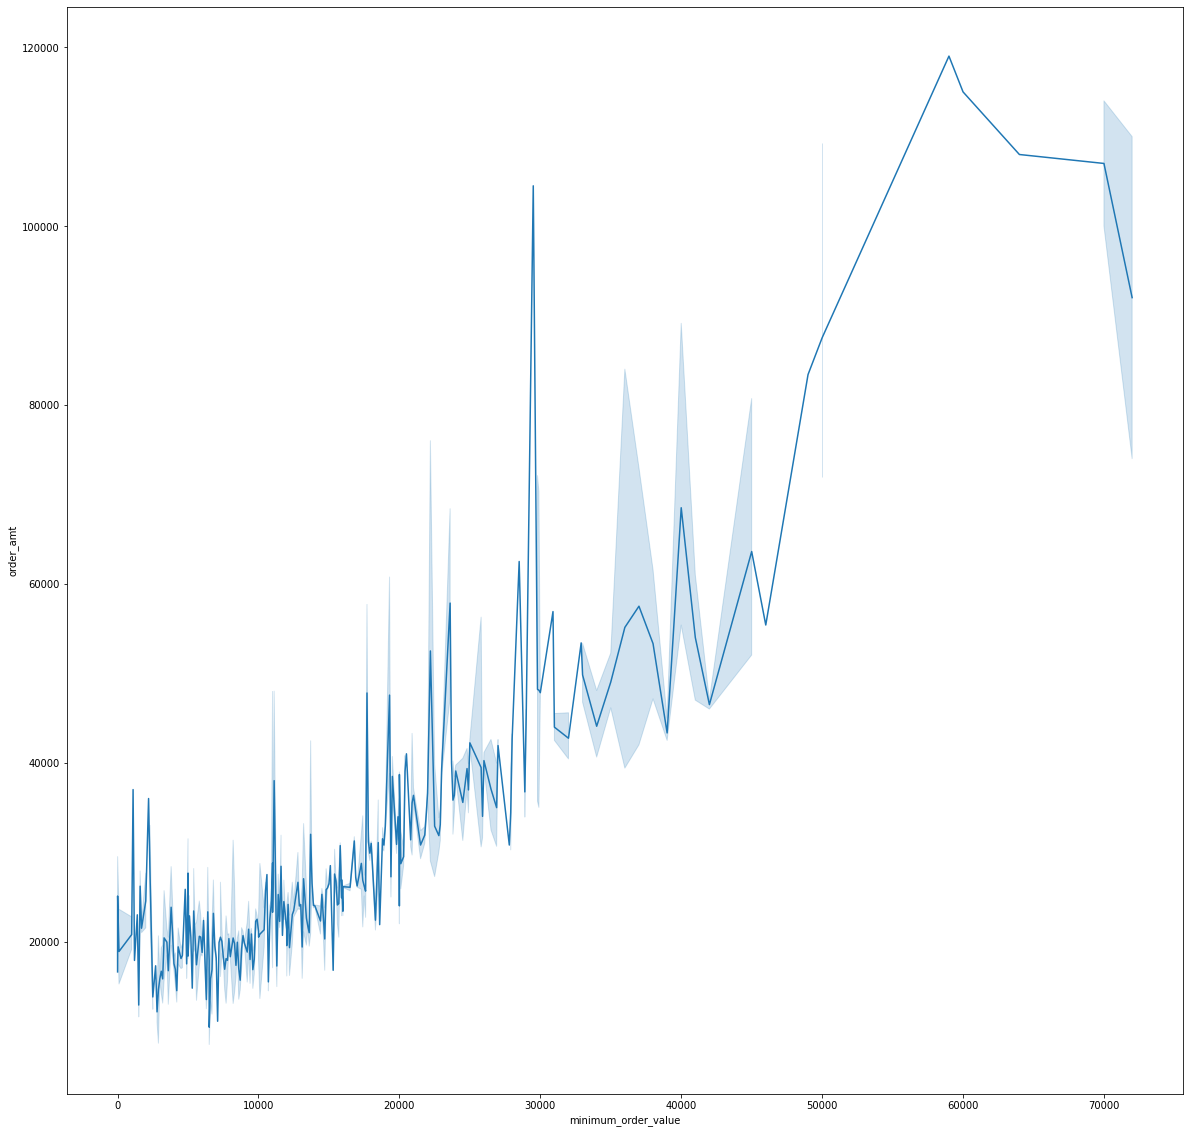

In [ ]:
plt.figure(figsize= (20,20))
sns.lineplot(x = 'minimum_order_value',y = 'order_amt', data = data )

In [ ]:
a = data.corr(method = 'pearson')
a

,order_id,order_distance_meter,discount_amt,order_amt,payment_amt,delivery_fee,minimum_order_value,delivery_type,delivery_method_code_id
order_id,1.000000,0.005996,0.012001,0.064537,0.053881,0.083360,0.158112,-0.064555,-0.064555
order_distance_meter,0.005996,1.000000,-0.084715,0.181099,0.187870,0.296169,0.194610,-0.017486,-0.017486
discount_amt,0.012001,-0.084715,1.000000,-0.049195,-0.275023,-0.155153,-0.038173,0.093394,0.093394
order_amt,0.064537,0.181099,-0.049195,1.000000,0.937736,0.172251,0.460125,-0.052177,-0.052177
payment_amt,0.053881,0.187870,-0.275023,0.937736,1.000000,0.190831,0.434921,-0.041745,-0.041745
delivery_fee,0.083360,0.296169,-0.155153,0.172251,0.190831,1.000000,0.215246,-0.048427,-0.048427
minimum_order_value,0.158112,0.194610,-0.038173,0.460125,0.434921,0.215246,1.000000,-0.049685,-0.049685
delivery_type,-0.064555,-0.017486,0.093394,-0.052177,-0.041745,-0.048427,-0.049685,1.000000,1.000000
delivery_method_code_id,-0.064555,-0.017486,0.093394,-0.052177,-0.041745,-0.048427,-0.049685,1.000000,1.000000


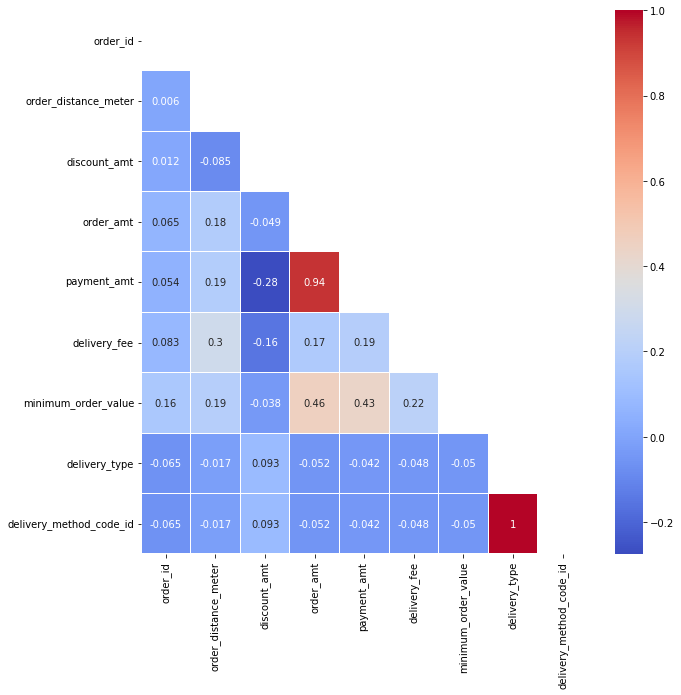

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

mask = np.zeros_like(a)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(a, cmap = 'coolwarm', annot= True, linewidths= 0.1, mask = mask)

In [ ]:
data.pivot_table(index='delivery_fee_cut', 
                 values=['order_amt','payment_amt','discount_amt','delivery_fee','minimum_order_value'], 
                 aggfunc='count')

,delivery_fee,discount_amt,minimum_order_value,order_amt,payment_amt
delivery_fee_cut,,,,,
1천원이하,46167,46167,46167,46167,46167
2천원이하,144386,144386,144386,144386,144386
3천원이하,158069,158069,158069,158069,158069
4천원이하,41577,41577,41577,41577,41577
5천원이하,7578,7578,7578,7578,7578
6천원이하,2017,2017,2017,2017,2017
7천원이하,700,700,700,700,700
8천원이하,263,263,263,263,263
9천원이하,100,100,100,100,100


In [ ]:
data.pivot_table(index='delivery_method_code_id', 
                 values=['order_amt','payment_amt','discount_amt','delivery_fee','minimum_order_value'], 
                 aggfunc='mean')

,delivery_fee,discount_amt,minimum_order_value,order_amt,payment_amt
delivery_method_code_id,,,,,
1.0,2018.736471,2126.220588,13027.185358,24712.008882,22103.891206
2.0,1792.570561,3075.679078,12088.624391,22548.252870,20286.834888


In [ ]:
data.pivot_table(index='delivery_method_code_id', 
                 values=['order_amt','payment_amt','discount_amt','delivery_fee','minimum_order_value'], 
                 aggfunc='count')

,delivery_fee,discount_amt,minimum_order_value,order_amt,payment_amt
delivery_method_code_id,,,,,
1.0,454640,454640,454640,454640,454640
2.0,40851,40851,40851,40851,40851


In [ ]:
data.pivot_table(index='delivery_fee', 
                 values=['order_amt','payment_amt','discount_amt','minimum_order_value'], 
                 aggfunc='count')

,discount_amt,minimum_order_value,order_amt,payment_amt
delivery_fee,,,,
0.0,94477,94477,94477,94477
10.0,2,2,2,2
100.0,164,164,164,164
200.0,3,3,3,3
300.0,49,49,49,49
...,...,...,...,...
14000.0,2,2,2,2
15000.0,7,7,7,7
18000.0,3,3,3,3


In [ ]:
# 수수료에 할인금액 포함여부에 따라서 payment_amt or order_amt
from sklearn.model_selection import train_test_split
X = data.drop(['payment_amt','order_amt','delivery_type'], axis = 1)
y = data['payment_amt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =100)

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lm = sm.OLS(y_train, X_train.astype(float)).fit()


ValueError: ignored